# E.D.A

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
yad2_cars = pd.read_csv('./Downloads/clean_cars1605.csv', header=0, sep=',', index_col=0) 

In [3]:
yad2_cars.shape

(2933, 23)

<AxesSubplot:title={'center':'Heat map of an overall data state'}>

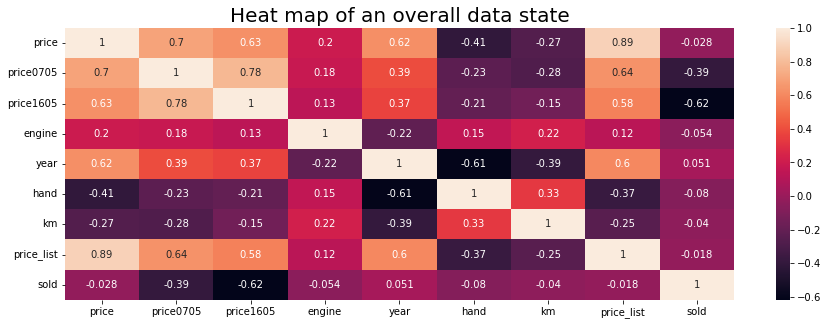

In [4]:
plt.figure(figsize=(15,5))
plt.title('Heat map of an overall data state', fontsize = 20)
yad2_cars2 = pd.DataFrame(yad2_cars, columns = ['price', 'price0705', 'price1605',  'engine', 'year', 'hand', 'km', 'price_list', 'sold'])
sns.heatmap(yad2_cars2.corr(), annot=True)

### we can see that there is positive coralation between:
1) price_list to price- very high coraltion of 0.89 that indicates most salers trying to sale their car around the price list.

2) price to price0705(0.7)- indicates that most of the cars remained around their first price but because the indication of the sold cars is '-1' it effects the heatmap result as an outlier. (will check on a diffrent heatmap) 

3) price to price1605(0.63)- as well as price0705 but sold even more. (as expected)

4) price to year(0.62)- the coraltion between the price and the price list indicates that price of a new car is higher.

5) price to sold(0.051)- This coraltion shows that as the year goes on, so does the price, it makes sense.

### and negative coraletion between:
1) price to sold(-0.028)- The higher the price, the less the vehicle is sold.

2) egine and sold(-0.054)- Indicates that the higher the engine capacity, the less the vehicle is sold, since people are looking for vehicles with smaller engine capacity, which means more economic. And today, with the entry of electric vehicles into the market, they are not measured by engine capacity.

3) km/hand to sold(-0.4/-0.8)- indicate that the higher the hand or the mileage, the less the vehicle is "sold".

4) pricelist to sold(-0.018)- indicates that the public prefers to buy vehicles at a lower price.


In [5]:
data_without_elc_eng = yad2_cars[~(yad2_cars.engine == 0)]
data_without_elc_eng.shape

(2848, 23)

<AxesSubplot:title={'center':'Heat map without elctric cars'}>

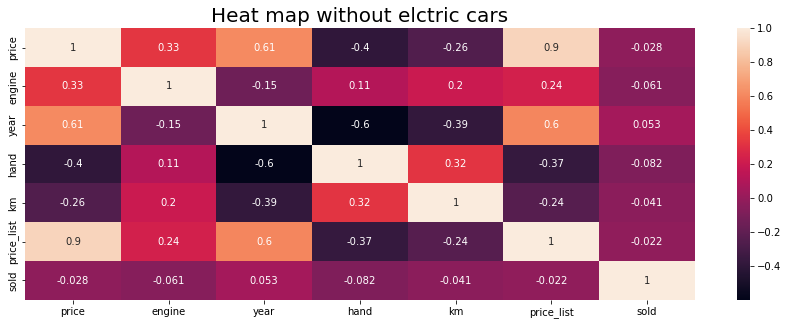

In [6]:
plt.figure(figsize=(15,5))
plt.title('Heat map without elctric cars', fontsize = 20)
df_visualize = pd.DataFrame(data_without_elc_eng, columns = ['price',  'engine', 'year', 'hand', 'km', 'price_list', 'sold'])
sns.heatmap(df_visualize.corr(), annot=True)

After deleting the electric vehicles, we can see that there is not much change in the heat map since the electric vehicle market is relatively new and there are not many electric vehicles for sale, so it does not have a big effect.

In [7]:
data_without_m1 = yad2_cars[~(yad2_cars.price0705 == -1)]
data_without_m1 = yad2_cars[~(yad2_cars.price1605 == -1)]
data_without_m1.shape

(1810, 23)

<AxesSubplot:title={'center':'Heat map without "-1" sold cars '}>

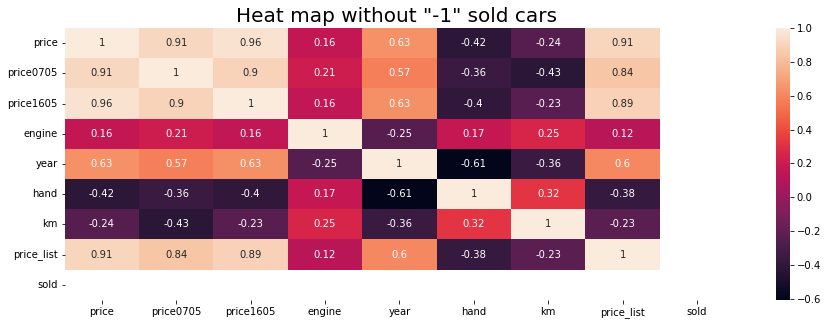

In [8]:
plt.figure(figsize=(15,5))
plt.title('Heat map without "-1" sold cars ', fontsize = 20)
df_visualize = pd.DataFrame(data_without_m1, columns = ['price', 'price0705', 'price1605',  'engine', 'year', 'hand', 'km', 'price_list', 'sold'])
sns.heatmap(df_visualize.corr(), annot=True)

### As promised above 
Here we see a heat map without the vehicles sold, meaning the ads that were previously marked with "-1" and indicated that the vehicle is now sold have been removed and this shows more accurate information that the majority of ads have remained at the same price. as expected.

In [9]:
data_of_sold_cars = yad2_cars[~(yad2_cars.sold == 0)]
data_of_sold_cars.shape

(1123, 23)

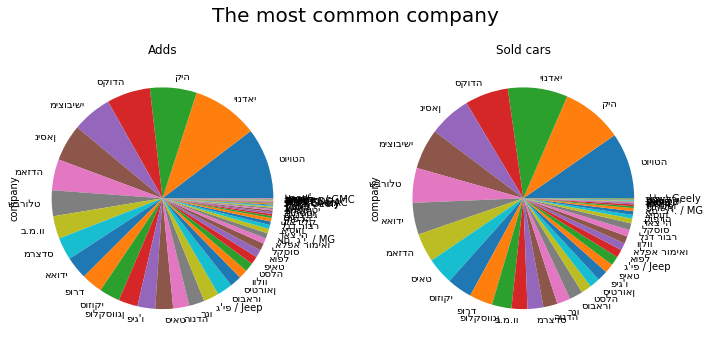

In [11]:
plt.figure(figsize=(10, 5))
plt.suptitle('The most common company', fontsize=20)

# Plotting the first bar plot
plt.subplot(1, 2, 1)
plt.title('Adds')
yad2_cars["company"].value_counts().plot(kind='pie')

# Plotting the second bar plot
plt.subplot(1, 2, 2)
plt.title('Sold cars')
data_of_sold_cars["company"].value_counts().plot(kind='pie')

plt.tight_layout()
plt.show()

### On the left
The 3 companies with the largest amount of ads are "Toyota", "Hyundai" and "Kia", which means that Japanese (Toyota) and Korean (Kia and Hyundai) vehicles are popular among Israelis.

### On the right
According to the sales we can see that Toyota is still in first place and this is not particularly surprising since Toyota has the largest amount of ads. But if we notice Kia, Nissan and Suzuki with a significant jump in sales compared to the amount of ads and this does justify the above claim that Japanese (Nissan and Suzuki) and Korean (Hyundai) vehicles are sold more than the other vehicles.
Also, the German Mercedes and BMW have a significant drop in sales compared to the amount of ads, and this also strengthens the claim a little.


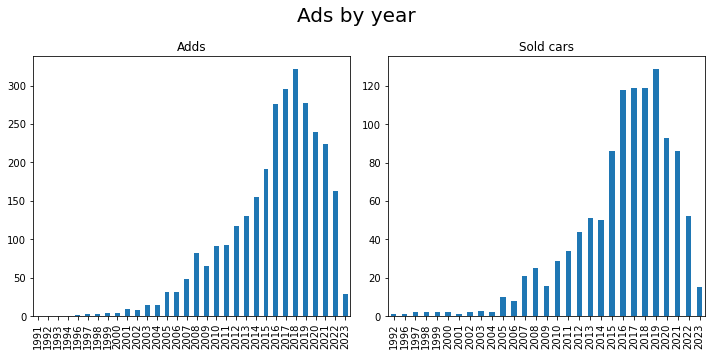

In [12]:
plt.figure(figsize=(10, 5))
plt.suptitle('Ads by year', fontsize=20)

# Plotting the first bar plot
plt.subplot(1, 2, 1)
plt.title('Adds')
yad2_cars["year"].value_counts().sort_index().plot(kind='bar')

# Plotting the second bar plot
plt.subplot(1, 2, 2)
plt.title('Sold cars')
data_of_sold_cars["year"].value_counts().sort_index().plot(kind='bar')

plt.tight_layout()
plt.show()

### On the left 
According to the amount of ads that are shown by years, we can see that most of the ads are around the year 2018 and from this we can learn that people sell their car after 5 years of buying it from the company.

### On the right
At the sold cars plot we can see that the amount of vehicles sold each year is in equal proportion to the left plot, but one outstanding figure can be noticed, if we refer to the year 2019 in the right plot we see where the amount of sales is the highest even though in the left graph the year 2018 is the highest. This can also be said about 2016 and 2017. 
And this shows that a 4 to 7 -year-old vehicle is the most desirable in the used market.